In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL

In [11]:
PIL.__version__

'7.1.2'

Le code marche uniquement avec les images de type *`JPG`*

In [15]:
pmz = plt.imread('data/pmz1.jpg')
pmz.shape

(3968, 2976, 3)

In [27]:
fil_img = plt.imread('data/couleur_fil.jpg')
fil_img.shape

(1138, 83, 3)

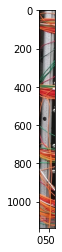

In [44]:
plt.imshow(fil)


- Créée 3 listes, une pour chaque couleur, récupère chaque pixel par lignes pour chaques couleurs

In [28]:
r = []
g = []
b = []
for line in fil_img:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

## K-Means clustering

In [29]:
from mpl_toolkits.mplot3d import Axes3D

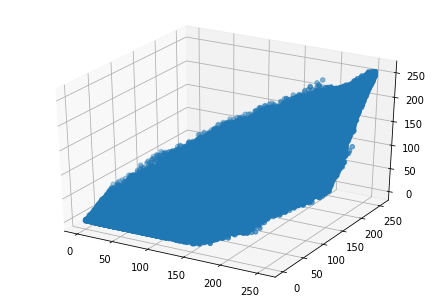

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

- On met toutes les couleurs `r`, `g`, `b` dans un Dataframe Pandas

In [36]:
df = pd.DataFrame({'red': r,'blue': b,'green': g})

There are essentially three steps involved in the process of k-means clustering with SciPy:

- Standardize the variables by dividing each data point by its standard deviation. We will use the whiten() method of the vq class.
- Generate cluster centers using the kmeans() method.
- Generate cluster labels for each data point using the vq() method of the vqclass.

In [37]:
from scipy.cluster.vq import whiten

In [38]:
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
40215,199,189,187,2.910815,3.011926,3.089088
75931,229,152,167,3.349631,2.422290,2.758704
10639,45,37,45,0.658224,0.589636,0.743363
88862,221,48,105,3.232613,0.764934,1.734515
50762,162,98,113,2.369608,1.561740,1.866668
20599,39,52,58,0.570461,0.828678,0.958113
19702,94,105,102,1.374958,1.673292,1.684957
19763,37,37,37,0.541207,0.589636,0.611210
56349,21,19,21,0.307171,0.302786,0.346903
45400,21,21,21,0.307171,0.334658,0.346903


In [34]:
from scipy.cluster.vq import kmeans

In [39]:
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

### Affiche les couleurs dominantes

In [40]:
print(cluster_centers)

[[1.35486843 0.85263012 0.66189135]
 [2.70847216 2.56197424 2.28356464]]


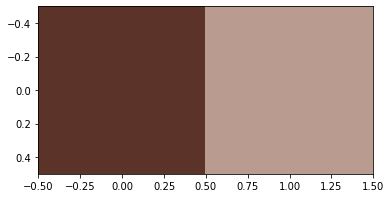

In [43]:
colors = []

r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255))

plt.imshow([colors])
plt.show()

# Autres methodes

In [45]:
import cv2 as cv
import math

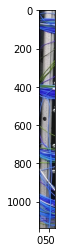

In [49]:
fil_2 = cv.cvtColor(fil_img,cv.COLOR_BGR2RGB)

plt.imshow(fil_2)
            

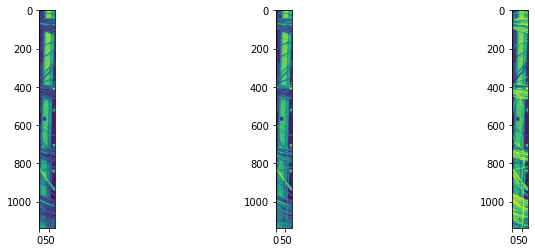

In [68]:
red,green,blue = cv.split(fil_2)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(red)

plt.subplot(132)
plt.imshow(green)

plt.subplot(133)
plt.imshow(blue)

In [64]:
hsv = cv.cvtColor(fil_2,cv.COLOR_BGR2HSV)

hue,sat,val = cv.split(hsv)

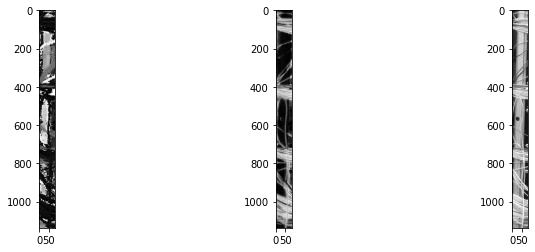

In [72]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(hue,cmap=plt.get_cmap('gray'))

plt.subplot(132)
plt.imshow(sat,cmap=plt.get_cmap('gray'))

plt.subplot(133)
plt.imshow(val,cmap=plt.get_cmap('gray'))

- La couche rouge permet de discriminer les billes bleues et vertes, qui apparaissent très sombres car elles comportent très peu de rouge. Pour segmenter l'image, il faut effectuer un seuillage :

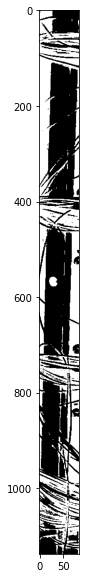

In [88]:
seuil=70.0

ret ,seg_red = cv.threshold(red,seuil,255.0,cv.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.imshow(seg_red,cmap=plt.get_cmap('gray'))